# IMPORTAMOS LIBREARIAS STANDARD

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORTAMOS LIBRERIAS PARA KMEANS

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

# CREAMOS DATASETS

In [3]:
X,y,c = make_blobs(500,cluster_std =0.8,centers=4,n_features=2,return_centers=True)
print(X)
print(y)
print(c)

[[ 4.69515746e+00  4.27485467e+00]
 [ 6.67198481e+00  4.94389717e+00]
 [-7.25443748e-01  4.72809933e+00]
 [ 8.73735404e-01  4.46097643e+00]
 [-8.98809667e-01  4.49157933e+00]
 [ 8.35445468e+00  5.50249480e+00]
 [ 6.55939198e+00  5.58512917e+00]
 [ 2.83462465e+00 -5.35358073e+00]
 [ 3.83713171e+00  4.62098971e+00]
 [ 4.75296114e+00 -5.51322560e+00]
 [ 4.57864599e+00  4.81249795e+00]
 [ 5.89111178e+00  5.49640786e+00]
 [ 3.20956753e+00 -5.59134691e+00]
 [ 4.86826457e+00  4.49583607e+00]
 [ 7.96143187e+00  4.96184580e+00]
 [ 2.70239477e+00 -5.36409299e+00]
 [ 8.31476595e+00  5.67794085e+00]
 [-7.50920917e-02  5.72334688e+00]
 [ 6.47427241e+00  5.28214329e+00]
 [-7.85354125e-01  4.76298014e+00]
 [ 1.94806713e+00 -5.25491328e+00]
 [ 3.31696489e+00 -6.01562187e+00]
 [ 7.67433920e+00  5.30260616e+00]
 [ 2.31717871e+00 -4.01124518e+00]
 [ 7.78868934e+00  5.74283515e+00]
 [ 6.97995559e+00  6.91721900e+00]
 [ 6.34820945e+00  4.71174020e+00]
 [ 4.03110073e+00 -7.21749995e+00]
 [ 5.36984899e+00  5

# CREAMOS DATAFRAMES CON VALORES ALEATORIOS

In [7]:
df_blobs = pd.DataFrame(
    {
        'x1': X[:,0],
        'x2': X[:,1],
        'y': y
    }
)
df_blobs

,x1,x2,y
0,4.695157,4.274855,2
1,6.671985,4.943897,3
2,-0.725444,4.728099,1
3,0.873735,4.460976,1
4,-0.898810,4.491579,1
...,...,...,...
495,5.053093,5.313364,2
496,-0.433564,6.792676,1
497,7.850678,6.542856,3
498,5.674908,4.454106,2


In [8]:
df_centers = pd.DataFrame(
    {
        'x1': c[:,0],
        'x2' :c[:,1]
    }
)
df_centers

,x1,x2
0,2.623206,-5.411338
1,-0.300124,4.799313
2,4.929488,4.750063
3,7.199924,5.571301


# VISUALIZAMOS LOS DATOS

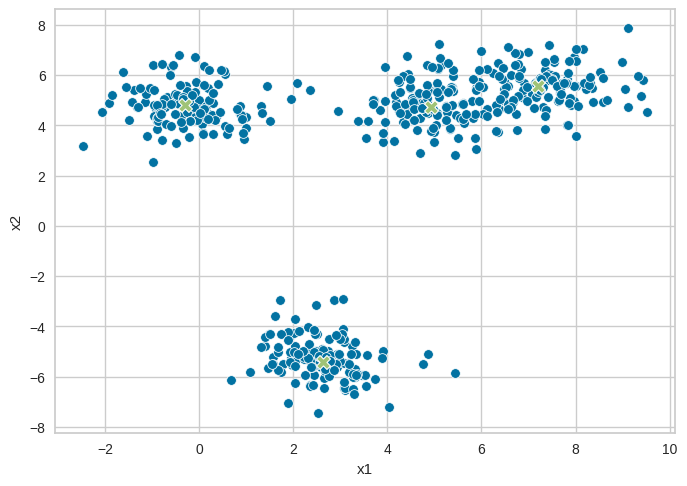

In [11]:
sns.scatterplot(data=df_blobs,x='x1',y='x2')
sns.scatterplot(data=df_centers,x='x1',y='x2',marker='X',s=100)
plt.show()